<a href="https://colab.research.google.com/github/Sandeep354/Fraud-Credit-Cards/blob/main/Creditcard_Fraud_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
# Feature-Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [33]:
# Training the SOM

# We will use minisom.py or install it --> developed by some developer
from minisom import MiniSom

In [34]:
# x,y --> grid shape
# input_len --> no.of features in the X dataset
# sigma --> radius of different neighbourhoods in the grid
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [35]:

# Initialize the weights (STEP 3)
som.random_weights_init(data=X)

# Train the som on X (STEP 4 to STEP 9) (we will do step 4 - 9 100 times)
som.train_random(data=X, num_iteration=100)

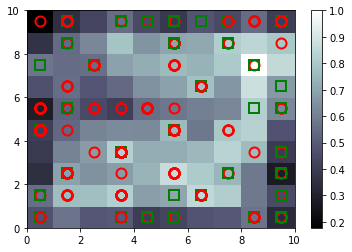

In [36]:
# Visualizing

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's'] # o-circle, s-square
color = ['r', 'g'] # r-red, g-green

for i, x in enumerate(X):
  # Get the winning node for the 1st customer
  w = som.winner(x=x)
  # on this winning node, place the colored marker (+0.5 to put marker on the centre of the winning node)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = color[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
  
show()

In [37]:
mappings = som.win_map(data=X)

In [40]:
# Pass some cordinates for reference
frauds = np.concatenate((mappings[(8,7)], mappings[(5,2)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [41]:
print (f"Number of frauds detected : {len(frauds)}")

Number of frauds detected : 15


If you select very bright regions, more accurate but less possible frauds will be detected.

On the other hand, less bright --> less accurate but more possible frauds will be detected.

## Part 2 - Going from Unsupervised to Supervised Deep Learning

In [43]:
# Create the matrix of features
customers = dataset.iloc[:, 1:].values # we dont need customer ID

In [44]:
# Creating the dependent variable (fraud or not --> binary)
is_fraud = np.zeros(shape=len(dataset))

In [45]:
# Now, put 1 where potentially customer id cheated
for i in range(len(dataset)):
  # ith line corresponds to ith customer and 0 --> customer id of customer number i
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

**Train the ANN** 

In [49]:
# Feature Scaling
customers = sc.fit_transform(customers)

In [50]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [51]:
# Initialize the ANN
classifier = Sequential()

In [52]:
# Adding the input layer and first hidden layer
# input_dim = number of frauds detected
classifier.add(Dense(units=2, kernel_initializer='uniform' ,activation='relu', input_dim=15))

In [57]:
# Adding the output layer
# for binary classification --> output units = 1
classifier.add(Dense(units=1, kernel_initializer='uniform' ,activation='sigmoid'))

In [58]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Fitting the ANN to the Training set
# dataset is very simple and small --> take very less batch_size and epochs
classifier.fit(x=customers, y=is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 896us/step - loss: 0.4174 - accuracy: 0.9623
Epoch 2/2
690/690 [==============================] - 1s 799us/step - loss: 0.1679 - accuracy: 0.9783


In [60]:
# Predict the probabilities of fraud
y_pred = classifier.predict(customers)

In [62]:
y_pred[:10]

array([[0.08031198],
       [0.08284116],
       [0.08302864],
       [0.07992855],
       [0.07955208],
       [0.07980669],
       [0.08176684],
       [0.07946557],
       [0.08171681],
       [0.07956287]], dtype=float32)

In [63]:
# Add 2nd column to y_pred (customer id)
# dont do just [:, 0] instead use [:, 0:1] cause we have to make it 2-D array 
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)

In [64]:
y_pred[:10]

array([[1.57761560e+07, 8.03119838e-02],
       [1.57395480e+07, 8.28411579e-02],
       [1.56628540e+07, 8.30286443e-02],
       [1.56876880e+07, 7.99285471e-02],
       [1.57157500e+07, 7.95520842e-02],
       [1.55711210e+07, 7.98066854e-02],
       [1.57264660e+07, 8.17668438e-02],
       [1.56603900e+07, 7.94655681e-02],
       [1.56639420e+07, 8.17168057e-02],
       [1.56386100e+07, 7.95628726e-02]])

In [65]:
# Sort the predicted probabilities (only sort by prob and not by the customer id)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [68]:
y_pred

array([[1.56548590e+07, 7.92261958e-02],
       [1.57238270e+07, 7.92278349e-02],
       [1.57250280e+07, 7.92375505e-02],
       ...,
       [1.57160820e+07, 9.06088948e-02],
       [1.57523440e+07, 9.14636552e-02],
       [1.56114090e+07, 9.18069780e-02]])